# Examples of oifits visibility functions

*NB: each section is self consistent*

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from oivis.oivisfit import fitfunctions
from oivis.oivisfit import fitutils
import os
import glob
from scipy import constants
import importlib
from oivis.oifits.oifits_read import Oifits
import numpy as np
import matplotlib.pyplot as plt

In [11]:
datadir = os.path.dirname(os.path.abspath(".")) + "/data/"

In [12]:
importlib.reload(fitfunctions)
importlib.reload(fitutils)

<module 'oivis.oivisfit.fitutils' from '/Users/bergejea/Software/tihpy/oivis/oivisfit/fitutils.py'>

### Point source

In [13]:
npoints = 100
u = np.linspace(0.01,130, npoints)
v = np.linspace(0.01,130, npoints)
refwavel = 1.65e-6
wavel = np.ones(npoints) * refwavel
x = [u, v, wavel, refwavel]
basep = np.sqrt(u**2 + v**2)

In [14]:
params = {}
params['FLUX'] = 1.0
params['SPI'] = 0.0
params['OFX'] = 0.0
params['OFY'] = 0.0

In [15]:
visdat = fitfunctions.vis_point_source(x, params)

(0.0, 1.1)

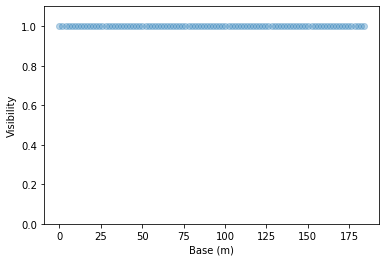

In [16]:
plt.figure(1)
ax = plt.subplot(111)
ax.plot(basep, np.abs(visdat['VIS']), 'o', alpha=0.3)
ax.set_ylabel('Visibility')
ax.set_xlabel('Base (m)')
ax.set_ylim(0,1.1)

### Uniform disk

In [17]:
npoints = 100
u = np.linspace(0.01,130, npoints)
v = np.linspace(0.01,130, npoints)
refwavel = 1.65e-6
wavel = np.ones(npoints) * refwavel
x = [u, v, wavel, refwavel]
basep = np.sqrt(u**2 + v**2)

In [19]:
# diameter
diam = 15 # milliarcsecond
params = {}
params['POSANG'] = 0
params['FLUX'] = 1.0
params['SPI'] = 0.0
params['OFX'] = 0.0
params['OFY'] = 0.0
params['ERATIO'] = 0.0
params['DIAM'] = diam * constants.arcsecond / 1000

In [20]:
visdat = fitfunctions.vis_uniform_disk(x, params)

Text(0.5, 0, 'Base (m)')

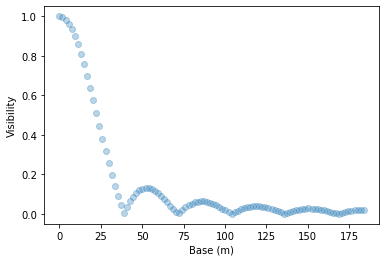

In [21]:
plt.figure(1)
ax = plt.subplot(111)
ax.plot(basep, np.abs(visdat['VIS']), 'o', alpha=0.3)
ax.set_ylabel('Visibility')
ax.set_xlabel('Base (m)')

### Uniform ring

In [22]:
npoints = 100
u = np.linspace(0.01,130, npoints)
v = np.linspace(0.01,130, npoints)
refwavel = 1.65e-6
wavel = np.ones(npoints) * refwavel
x = [u, v, wavel, refwavel]
basep = np.sqrt(u**2 + v**2)

In [24]:
#inner diameter
indiam = 7.5 # milli-arcseconds
# rim width
width = 2.0 # milli-arcsecond
params = {}
params['POSANG'] = 0
params['FLUX'] = 1.0
params['SPI'] = 0.0
params['OFX'] = 0.0
params['OFY'] = 0.0
params['ERATIO'] = 1.0
params['INDIAM'] = indiam * constants.arcsecond / 1000
params['WIDTH'] = width * constants.arcsecond / 1000

In [25]:
visdat = fitfunctions.vis_uniform_ring(x, params)

Text(0.5, 0, 'Base (m)')

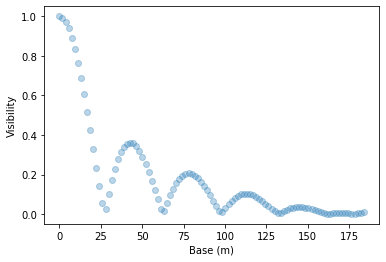

In [26]:
plt.figure(1)
ax = plt.subplot(111)
ax.plot(basep, np.abs(visdat['VIS']), 'o', alpha=0.3)
ax.set_ylabel('Visibility')
ax.set_xlabel('Base (m)')

### Combining two functions

**Uniform disk and point like source**

In [27]:
npoints = 500
u = np.linspace(0.01,200, npoints)
v = np.linspace(0.01,200, npoints)
refwavel = 1.65e-6
wavel = np.ones(npoints) * refwavel
x = [u, v, wavel, refwavel]
basep = np.sqrt(u**2 + v**2)

In [28]:
params = {}
separation = 30 # milliarcsecond
diam = 5 # milliarcsecond
# Uniform diameter star
params['vis_uniform_disk;1:POSANG'] = 0
params['vis_uniform_disk;1:FLUX'] = 1.0
params['vis_uniform_disk;1:SPI'] = 0.0
params['vis_uniform_disk;1:OFX'] = 0.0
params['vis_uniform_disk;1:OFY'] = 0.0
params['vis_uniform_disk;1:ERATIO'] = 1.0
params['vis_uniform_disk;1:DIAM'] = diam * constants.arcsecond / 1000
# Point like source star
params['vis_point_source;1:FLUX'] = 0.2
params['vis_point_source;1:SPI'] = 0.0
params['vis_point_source;1:OFX'] = separation * constants.arcsecond / 1000.0
params['vis_point_source;1:OFY'] = separation * constants.arcsecond / 1000.0
fluxratio = params['vis_point_source;1:FLUX'] / (params['vis_uniform_disk;1:FLUX']+params['vis_point_source;1:FLUX'])

In [29]:
visdat = fitfunctions.combine_functions(x, params)

Call for function vis_point_source
Call for function vis_uniform_disk


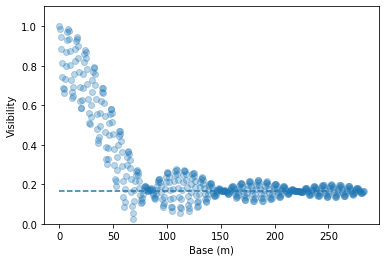

In [30]:
plt.figure(1)
ax = plt.subplot(111)
ax.plot(basep, np.abs(visdat['VIS']), 'o', alpha=0.3)
ax.set_ylabel('Visibility')
ax.set_xlabel('Base (m)')
ax.set_ylim(0,1.1)
ax.hlines(fluxratio, 0, 250,linestyles="dashed")

**Plotting the corresponding the image**

In [31]:
visgrid = fitutils.vis_grid(250, 250, 1.65e-6, params, fitfunctions.combine_functions)

Call for function vis_point_source
Call for function vis_uniform_disk


/Users/bergejea/Software/tihpy/oivis/oivisfit/fitutils.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array([xi1, yi1, wavel, wavel])


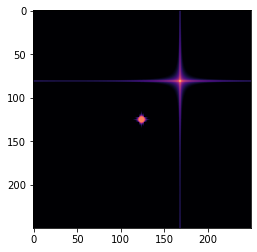

In [32]:
imshow(np.log10(visgrid['IMAGE'] / np.average(visgrid['IMAGE'])), cmap="magma", vmin=0.3)

### Sinusoidaly modulated ring

In [33]:
npoints = 500
u = np.linspace(0.01,200, npoints)
v = np.linspace(0.01,200, npoints)
refwavel = 1.65e-6
wavel = np.ones(npoints) * refwavel
x = [u, v, wavel, refwavel]
basep = np.sqrt(u**2 + v**2)

In [34]:
params = {}
params['POSANG'] = 30.0 / 180. * np.pi
params['FLUX'] = 1.0
params['OFX'] = 0.0 * constants.arcsecond / (1000)
params['OFY'] = 0.0 * constants.arcsecond / (1000)
params['RADIUS'] = 6.0 * constants.arcsecond / (1000)
params['RINGRADIUS'] = 25.0 * constants.arcsecond / (1000)
params['ERATIO'] = 0.7
params['FLOR'] = 0.0
params['MOD'] = 3
params['CM'] = [0.1, 0.5, 0.4]
params['SM'] = [0.1, 0.7, 0.9]
params['SPI'] = 0.0

In [35]:
visdat = fitfunctions.vis_modulated_ring(x, params)

**Représentation d'une image de l'objet**

In [38]:
visgrid = fitutils.vis_grid(250, 250, 1.65e-6, params, fitfunctions.vis_modulated_ring)

/var/folders/h8/k7_4sk9s0k75scxxqp5srff80027nc/T/ipykernel_49808/105490565.py:1: RuntimeWarning: divide by zero encountered in log10
  imshow(np.log10(visgrid['IMAGE'] / np.average(visgrid['IMAGE'])), cmap="magma", vmin=0.3)


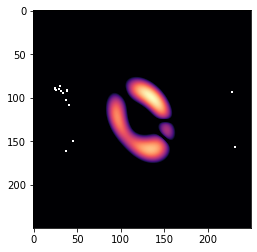

In [39]:
imshow(np.log10(visgrid['IMAGE'] / np.average(visgrid['IMAGE'])), cmap="magma", vmin=0.3)

## Comparing with Aspro data

In [42]:
#loading an Aspro file and retrieving binary data
oifile = 'Aspro2_HD_100546_PIONIER_binary_frat_1_10_sep_7_mas_pa_30_deg_noNoise.fits'
binarydatafile = datadir + oifile

In [43]:
oibinarydata = Oifits([binarydatafile])

INFO:oivis.oifits.oifits_read:Loading file /Users/bergejea/Software/tihpy/oivis/data/Aspro2_HD_100546_PIONIER_binary_frat_1_10_sep_7_mas_pa_30_deg_noNoise.fits
INFO:oivis.oifits.oifits_read:No ORIGIN name found in main header
INFO:oivis.oifits.oifits_read:No INSTRUMENT name found in main header


In [44]:
# isolating one wavelength (but no effect sin SPI set to 0.0)
wavecpdata = oibinarydata.cpdata['EFF_WAVE']
wavetable = np.unique(wavecpdata)
waveref = wavetable[2]
# extracting v2data
binv2data = oibinarydata.v2data['VIS2DATA']
bincpdata = oibinarydata.cpdata['T3PHI']
ucoord = oibinarydata.v2data['UCOORD']
vcoord = oibinarydata.v2data['VCOORD']
bp = oibinarydata.v2data['BP']
wavev2data = oibinarydata.v2data['EFF_WAVE']
# extracting cp data
bincpdata = oibinarydata.cpdata['T3PHI']
u1coord = oibinarydata.cpdata['U1COORD']
v1coord = oibinarydata.cpdata['V1COORD']
u2coord = oibinarydata.cpdata['U2COORD']
v2coord = oibinarydata.cpdata['V2COORD']
bpgeom = oibinarydata.cpdata['BPGEOM']
# extracting uv table
x = np.array([ucoord, vcoord, wavev2data, waveref])
y = np.array([u1coord, v1coord, u2coord, v2coord,  wavecpdata, waveref])

/var/folders/h8/k7_4sk9s0k75scxxqp5srff80027nc/T/ipykernel_49808/2904867595.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array([ucoord, vcoord, wavev2data, waveref])
/var/folders/h8/k7_4sk9s0k75scxxqp5srff80027nc/T/ipykernel_49808/2904867595.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array([u1coord, v1coord, u2coord, v2coord,  wavecpdata, waveref])


In [53]:
#binary parameters
paramsbin = {
'vis_point_source;1:FLUX':0.909,
'vis_point_source;1:SPI':0.0,
'vis_point_source;1:OFX':0.0 * constants.arcsecond / (1000),
'vis_point_source;1:OFY':0.0 * constants.arcsecond / (1000), 
'vis_point_source;2:FLUX':0.091,
'vis_point_source;2:SPI':0.0,
'vis_point_source;2:OFX': 3.5 * constants.arcsecond / (1000),
'vis_point_source;2:OFY':6.06 * constants.arcsecond / (1000), 
} # 3.5 - 6.06

In [54]:
# computing visibilities and closure phases using same uv  coverage and wavelength as aspro
vismoddata = fitfunctions.combine_functions(x, paramsbin)
cpmoddata = fitfunctions.compute_closure_phase(y, "combine_functions", paramsbin)

Call for function vis_point_source
Call for function vis_point_source
Call for function vis_point_source
Call for function vis_point_source
Call for function vis_point_source
Call for function vis_point_source
Call for function vis_point_source
Call for function vis_point_source


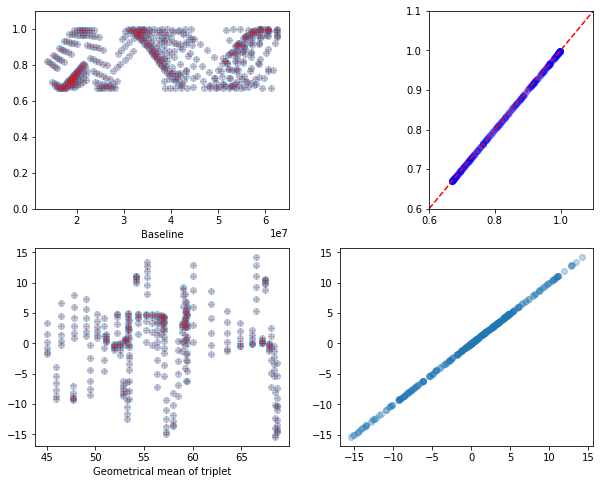

In [48]:
plt.figure(figsize=(10,8))
ax1 = plt.subplot(221)
ax1.plot(bp/wavev2data, np.abs(vismoddata['VIS'])**2,'o', alpha=0.3)
ax1.plot(bp/wavev2data, binv2data,'+r', alpha=0.3)
ax1.set_ylim([0,1.1])
ax1.set_xlabel("Baseline")
ax3 = plt.subplot(233)
ax3.plot(np.abs(vismoddata['VIS'])**2, binv2data, 'ob', alpha=0.1)
ax3.set_xlim([0.6, 1.1])
ax3.set_ylim([0.6, 1.1])
ax3.plot([0.6,1.1], [0.6, 1.1], '--r')
ax2 = plt.subplot(223)
ax2.plot(bpgeom, cpmoddata,'o', alpha=0.3)
ax2.plot(bpgeom, bincpdata,'+r', alpha=0.3)
ax2.set_xlabel("Geometrical mean of triplet")
ax4 = plt.subplot(224)
ax4.plot(cpmoddata, bincpdata, 'o', alpha=0.3)

## Comment simuler un anneau modulé à la Lazareff et al. 2017

In [56]:
# HD 100546 parameters
params = {
'vis_gaussian;1:FLUX': 0.11,
'vis_gaussian;1:SPI': 2.0,
'vis_gaussian;1:OFX': 0.0 * constants.arcsecond / (1000),
'vis_gaussian;1:OFY': 0.0 * constants.arcsecond / (1000),
'vis_gaussian;1:POSANG': 0.0 / 180. *np.pi,
'vis_gaussian;1:FWHM': 2000 * constants.arcsecond / (1000),
'vis_gaussian;1:ERATIO': 0.0,
'vis_point_source;1:FLUX':0.55,
'vis_point_source;1:SPI':2.0,
'vis_point_source;1:OFX':0.0 * constants.arcsecond / (1000),
'vis_point_source;1:OFY':0.0 * constants.arcsecond / (1000),
'vis_modulated_ring;1:POSANG': 2.66,
'vis_modulated_ring;1:FLUX': 0.34,
'vis_modulated_ring;1:SPI': 0.0,   
'vis_modulated_ring;1:OFX': 0.0 * constants.arcsecond / (1000),
'vis_modulated_ring;1:OFY': 0.0 * constants.arcsecond / (1000),
'vis_modulated_ring;1:RADIUS': 3.36 * constants.arcsecond / (1000),
'vis_modulated_ring;1:RINGRADIUS': 2.25 * constants.arcsecond / (1000),
'vis_modulated_ring;1:ERATIO': 0.69,
'vis_modulated_ring;1:FLOR': 1.0,
'vis_modulated_ring;1:MOD': 1.0,
'vis_modulated_ring;1:CM': [0.1],
'vis_modulated_ring;1:SM': [-0.1]
}

In [61]:
# Defining observation parameters
# Reading oifits aspro data to generate realistic uvcoverage
waveref = 1.65e-6 # microns
oifile = "Aspro2_HD_100546_PIONIER_1_533-1_772-6ch_A0-G1-J2-J1.fits"
datafile = datadir + oifile
oidata = Oifits([datafile])
u1coord = oidata.cpdata['U1COORD']
v1coord = oidata.cpdata['V1COORD']
u2coord = oidata.cpdata['U2COORD']
v2coord = oidata.cpdata['V2COORD']
wavel = oidata.cpdata['EFF_WAVE']
mjd = oidata.cpdata['MJD']
y = np.array([u1coord, v1coord, u2coord, v2coord, wavel, waveref])

INFO:oivis.oifits.oifits_read:Loading file /Users/bergejea/Software/tihpy/oivis/data/Aspro2_HD_100546_PIONIER_1_533-1_772-6ch_A0-G1-J2-J1.fits
INFO:oivis.oifits.oifits_read:No ORIGIN name found in main header
INFO:oivis.oifits.oifits_read:No INSTRUMENT name found in main header
/var/folders/h8/k7_4sk9s0k75scxxqp5srff80027nc/T/ipykernel_49808/4244673253.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array([u1coord, v1coord, u2coord, v2coord, wavel, waveref])


In [62]:
# expected cp with the uv coverage
cp = fitfunctions.compute_closure_phase(y, 'combine_functions', params)

Call for function vis_gaussian
Call for function vis_modulated_ring
Call for function vis_point_source
Call for function vis_gaussian
Call for function vis_modulated_ring
Call for function vis_point_source
Call for function vis_gaussian
Call for function vis_modulated_ring
Call for function vis_point_source


In [63]:
# removing star to show the image
params['vis_point_source;1:FLUX'] = 0.0
visgrid = fitutils.vis_grid(1000, 100, waveref, params, fitfunctions.combine_functions)
image = visgrid['IMAGE']

Call for function vis_gaussian
Call for function vis_modulated_ring
Call for function vis_point_source


<Figure size 720x576 with 0 Axes>

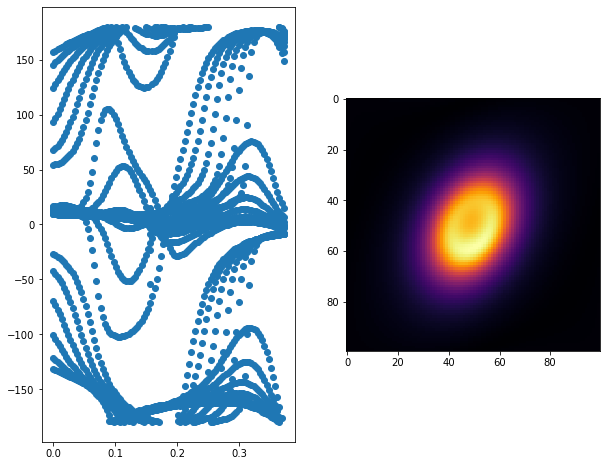

In [64]:
plt.figure(figsize=(10,8))
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 8))
ax1.plot(mjd -mjd[0], cp, 'o')
ax2.imshow(image, interpolation = 'nearest', cmap = cm.inferno)

## Comparing function with Lazareff et al. 2017 Herbig data

Je reprends les paramètres du papier.

In [289]:
# extracting data from the Large Program PIONIER: target HD 100546
listdir = glob.glob(datadir+'*HD100546*')
oiHD100546 = Oifits(listdir)
ucoord = oiHD100546.v2data['UCOORD']
vcoord = oiHD100546.v2data['VCOORD']
bp = oiHD100546.v2data['BP']
vis2data = oiHD100546.v2data['VIS2DATA']
v2wavetable = oiHD100546.v2data['EFF_WAVE']
cpwavetable = oiHD100546.cpdata['EFF_WAVE']
u1coord = oiHD100546.cpdata['U1COORD']
v1coord = oiHD100546.cpdata['V1COORD']
u2coord = oiHD100546.cpdata['U2COORD']
v2coord = oiHD100546.cpdata['V2COORD']
cpdata = oiHD100546.cpdata['T3PHI']
waveref = 1.68e-6
x = [ucoord, vcoord, v2wavetable, waveref]
y = [u1coord, v1coord, u2coord, v2coord, cpwavetable, waveref]

INFO:oivis.oifits.oifits_read:Loading file /Users/bergejea/Software/tihpy/oivis/data/2013-01-30_SCI_HD100546_oiDataCalib.fits
INFO:oivis.oifits.oifits_read:No ORIGIN name found in main header
INFO:oivis.oifits.oifits_read:No INSTRUMENT name found in main header
INFO:oivis.oifits.oifits_read:Loading file /Users/bergejea/Software/tihpy/oivis/data/2013-01-29_SCI_HD100546_oiDataCalib.fits
INFO:oivis.oifits.oifits_read:No ORIGIN name found in main header
INFO:oivis.oifits.oifits_read:No INSTRUMENT name found in main header
INFO:oivis.oifits.oifits_read:Loading file /Users/bergejea/Software/tihpy/oivis/data/2013-01-31_SCI_HD100546_oiDataCalib.fits
INFO:oivis.oifits.oifits_read:No ORIGIN name found in main header
INFO:oivis.oifits.oifits_read:No INSTRUMENT name found in main header
INFO:oivis.oifits.oifits_read:Loading file /Users/bergejea/Software/tihpy/oivis/data/2013-01-28_SCI_HD100546_oiDataCalib.fits
INFO:oivis.oifits.oifits_read:No ORIGIN name found in main header
INFO:oivis.oifits.oifi

In [295]:
# cas de HD100546
params = {
'vis_gaussian;1:ERATIO': 0.0,
 'vis_gaussian;1:FLUX': 0.11,
 'vis_gaussian;1:FWHM': 9.69627362219072e-06,
 'vis_gaussian;1:OFX': 0.0,
 'vis_gaussian;1:OFY': 0.0,
 'vis_gaussian;1:POSANG': 0.0,
 'vis_gaussian;1:SPI': 1.494702196851257,
 'vis_point_source;1:FLUX': 0.55000000000000004,
 'vis_point_source;1:OFX': 0.0,
 'vis_point_source;1:OFY': 0.0,
 'vis_point_source;1:SPI': 1.494702196851257,
 'vis_modulated_ring;1:CM': [0.17000000000000001],
 'vis_modulated_ring;1:ERATIO': 0.68999999999999995,
 'vis_modulated_ring;1:FLOR': 1.0,
 'vis_modulated_ring;1:FLUX': 0.34000000000000002,
 'vis_modulated_ring;1:MOD': 1.0,
 'vis_modulated_ring;1:OFX': 0.0,
 'vis_modulated_ring;1:OFY': 0.0,
 'vis_modulated_ring;1:POSANG': 152,
 'vis_modulated_ring;1:RADIUS': 6.58134267252314e-09,
 'vis_modulated_ring;1:RINGRADIUS': 1.0922310132679528e-08,
 'vis_modulated_ring;1:SM': [-0.17000000000000001],
 'vis_modulated_ring;1:SPI': -2.4300000000000002}
visibility = fitfunctions.combine_functions(x, params)
cpmodel = fitfunctions.compute_closure_phase(y, "combine_functions",params)
vis2model = np.abs(visibility['VIS'])**2

Call for function vis_modulated_ring
Call for function vis_gaussian
Call for function vis_point_source
Call for function vis_modulated_ring
Call for function vis_gaussian
Call for function vis_point_source
Call for function vis_modulated_ring
Call for function vis_gaussian
Call for function vis_point_source
Call for function vis_modulated_ring
Call for function vis_gaussian
Call for function vis_point_source


(0, 1)

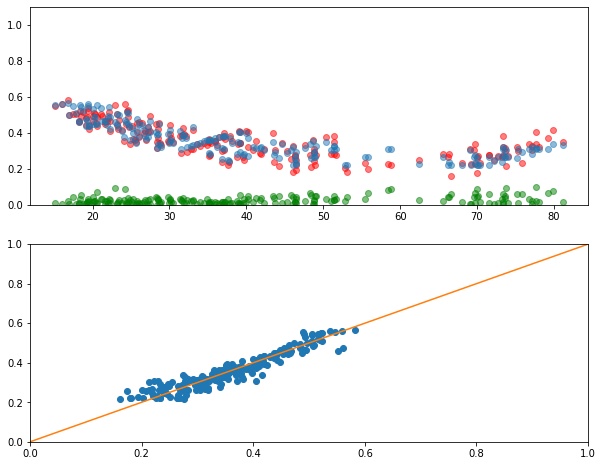

In [297]:
# Comparing visibilities
plt.figure(1, figsize=(10, 8))
ax1 = plt.subplot(211)
ax1.plot(bp / v2wavetable *1e-6, vis2data, 'or', alpha = 0.5)
ax1.set_ylim([0,1.1])
ax1.plot(bp / v2wavetable *1e-6, vis2model, 'o', alpha = 0.5)
#residuals
v2diff = np.abs(np.absolute(vis2model - vis2data))
ax1.plot(bp / v2wavetable *1e-6, v2diff, 'og', alpha = 0.5)
ax2 = plt.subplot(212)
ax2.plot(vis2data, vis2model, 'o')
ax2.plot([0,1],[0,1])
ax2.set_xlim([0,1])
ax2.set_ylim([0,1])

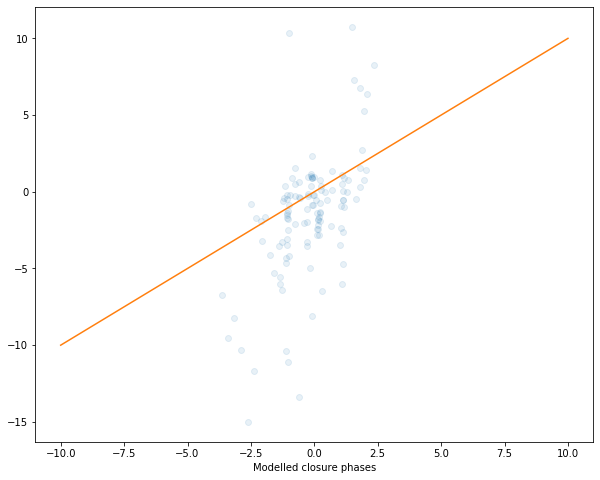

In [298]:
# now closure phases
plt.figure(1, figsize=(10, 8))
ax1 = plt.subplot(111)
ax1.plot(cpmodel, cpdata, 'o', alpha=0.1)
ax1.set_xlabel("Modelled closure phases")
ax2.set_ylabel("Measured closure phases")
ax1.plot([-10,10], [-10, 10], '-')